# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

In [78]:
print(cities)

url = f"https://api.openweathermap.org/data/3.0/weather{cities}&appid=7e789d9d6e61540ee565b77336060b76"

response=requests.get(url)

if response.status_code == 200:
    print('yay!')
else:
    print('boo')

['san antonio de pale', 'grytviken', 'bamboo flat', 'port alfred', 'west island', 'waitangi', 'proletariy', 'murrells inlet', 'mundri', 'adamstown', 'ajuchitlan del progreso', 'ushuaia', 'bethel', 'kikwit', 'yellowknife', 'ola', "nar'yan-mar", 'aguie', 'invercargill', 'mantua', 'hassi messaoud', 'port-aux-francais', 'puerto natales', 'iskateley', 'codrington', 'olinda', 'colonia', 'novyy urengoy', 'nemuro', 'taiohae', 'aguilas', 'albany', 'taoudenni', 'ritchie', 'smarde', 'as sanad', 'villamontes', 'santa cruz del sur', 'safotu', 'amungan', 'mana', 'puerto ayora', 'anadyr', 'devinuwara', 'thompson', 'pingliang', 'kiruhura', 'dudinka', 'hamilton', 'bredasdorp', 'cantel', 'kiunga', 'namibe', 'bikenibeu village', 'hasaki', 'lerwick', 'canutama', 'alesund', 'mahabaleshwar', 'longyearbyen', 'hermanus', 'keflavik', 'ribeira grande', 'whitehorse', 'tiksi', 'puerto aysen', 'edinburgh of the seven seas', 'aasiaat', "arthur's town", 'blackmans bay', 'coahuayana de hidalgo', 'bilibino', 'rongelap

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | bamboo flat
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | proletariy
Processing Record 8 of Set 1 | murrells inlet
Processing Record 9 of Set 1 | mundri
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ajuchitlan del progreso
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | kikwit
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | nar'yan-mar
Processing Record 18 of Set 1 | aguie
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | mantua
Processing Record 21 of Set 1 | hassi messaoud
Processing Record 22 of Set 1 | po

In [80]:
# Convert the cities weather data into a Pandas DataFrame
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")

# Show Record Count
city_weather_df.count()

City          556
Lat           556
lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [81]:
# Display sample data
city_weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,73.31,75.0,93.0,11.52,GQ,1.722981e+09
1,grytviken,-54.2811,-36.5092,16.30,72.0,26.0,7.87,GS,1.722980e+09
2,bamboo flat,11.7000,92.7167,78.89,89.0,100.0,2.30,IN,1.722981e+09
3,port alfred,-33.5906,26.8910,57.65,75.0,0.0,8.30,ZA,1.722981e+09
4,west island,-12.1568,96.8225,80.58,74.0,100.0,13.80,CC,1.722981e+09


In [82]:
# Export the City_Data into a csv
city_weather_df.to_csv("city_weather_data.csv", index=False)

In [83]:
# Read saved data
weather_df = pd.read_csv("../WeatherPy/output_data/city_weather_data.csv", index_col="City")

# Display sample data
weather_df.head()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
iqaluit,63.7506,-68.5145,46.13,75.0,100.0,3.44,CA,1.722964e+09
hamilton,39.1834,-84.5333,92.88,57.0,0.0,12.66,US,1.722964e+09
port-aux-francais,-49.3500,70.2167,37.76,75.0,26.0,18.79,TF,1.722964e+09
gao,16.6362,1.6370,101.23,26.0,62.0,7.05,ML,1.722964e+09
usinsk,65.9939,57.5281,53.38,60.0,7.0,11.70,RU,1.722964e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

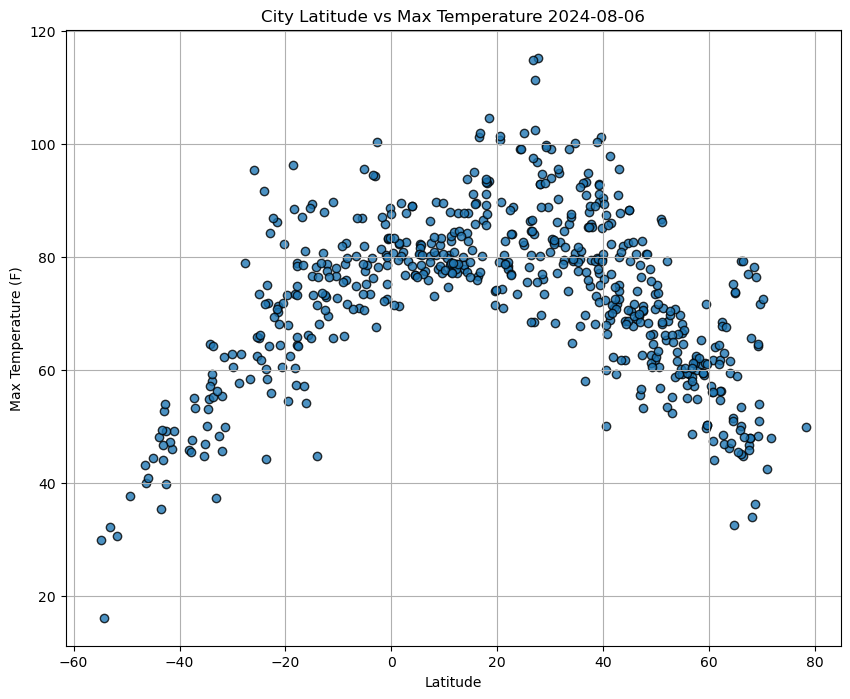

In [84]:
# add date/time for extra detail to data visualization
from datetime import datetime
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Humidity

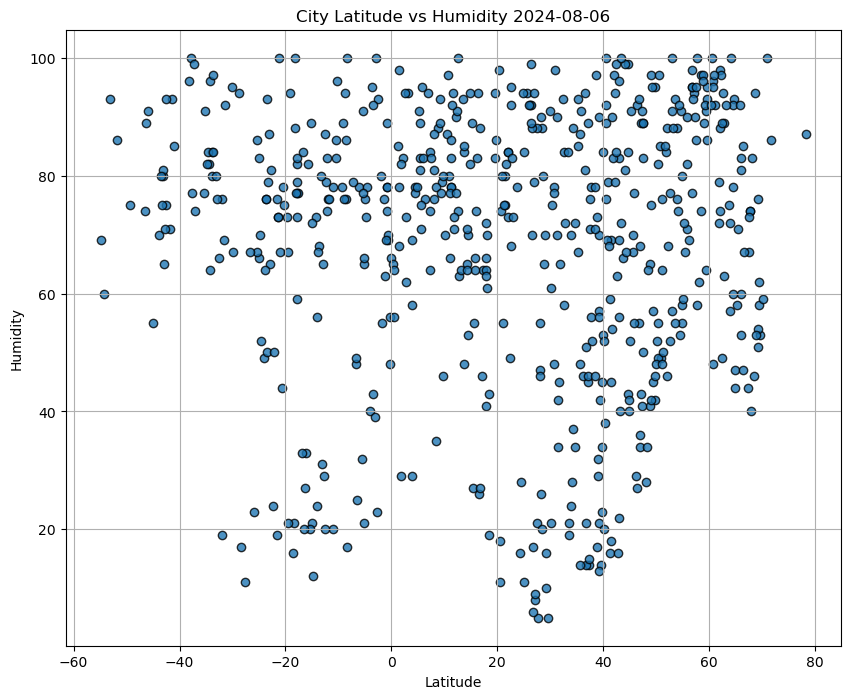

In [85]:
# add date/time for extra detail to data visualization
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs Humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs Humidity {date_time}")
plt.grid()
plt.savefig("output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Cloudiness

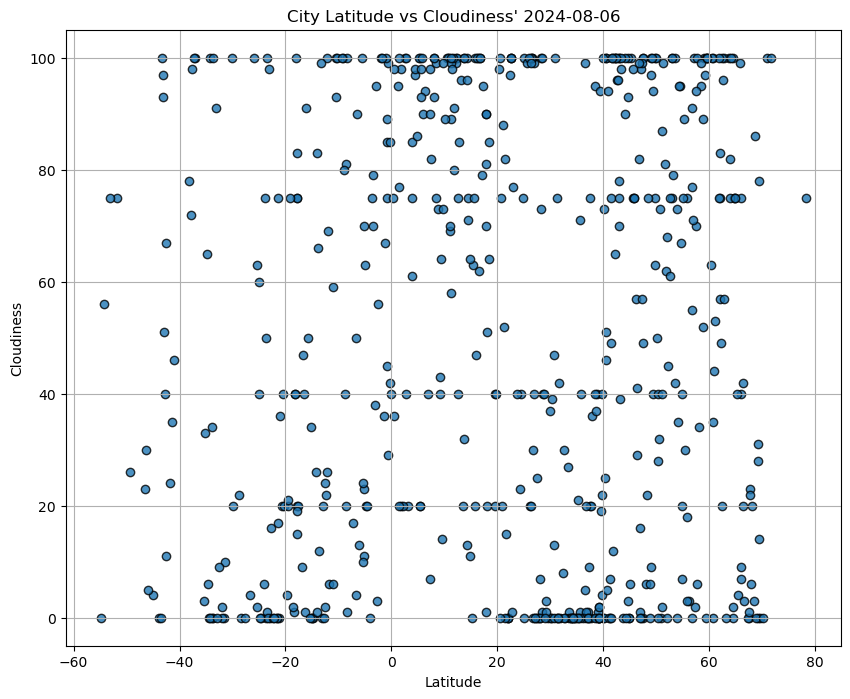

In [86]:
# Build the scatter plots for latitude vs. cloudiness
# add date/time for extra detail to data visualization
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs Humidity.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs Cloudiness' {date_time}")
plt.grid()
plt.savefig("output_data/latitude_vs_Cloudiness.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

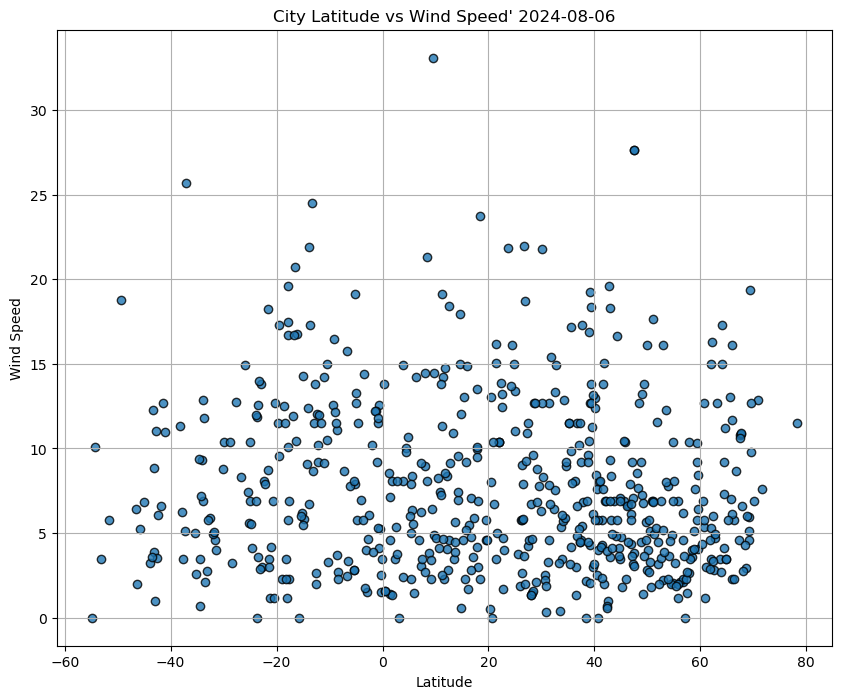

In [87]:
# Build the scatter plots for latitude vs. wind speed
# add date/time for extra detail to data visualization
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs Humidity.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"City Latitude vs Wind Speed' {date_time}")
plt.grid()
plt.savefig("output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_df[weather_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
iqaluit,63.7506,-68.5145,46.13,75.0,100.0,3.44,CA,1.722964e+09
hamilton,39.1834,-84.5333,92.88,57.0,0.0,12.66,US,1.722964e+09
gao,16.6362,1.6370,101.23,26.0,62.0,7.05,ML,1.722964e+09
usinsk,65.9939,57.5281,53.38,60.0,7.0,11.70,RU,1.722964e+09
mawlamyinegyunn,16.3833,95.2667,76.64,94.0,100.0,5.48,MM,1.722964e+09


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_df[weather_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
port-aux-francais,-49.3500,70.2167,37.76,75.0,26.0,18.79,TF,1.722964e+09
avarua,-21.2078,-159.7750,68.05,100.0,0.0,1.14,CK,1.722964e+09
edinburgh of the seven seas,-37.0676,-12.3116,53.31,74.0,100.0,25.68,SH,1.722964e+09
santa cruz,-17.8000,-63.1667,78.85,73.0,75.0,19.57,BO,1.722964e+09
adamstown,-25.0660,-130.1015,65.68,66.0,60.0,10.40,PN,1.722964e+09


###  Temperature vs. Latitude Linear Regression Plot

In [133]:

# Linear regression on Northern Hemisphere
#Extract the data for linear regression
def plot_linear_regression(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 3)) + "x + " + str(round(intercept, 4))
    
    # Create scatter plot
    
    plt.scatter(x, y)
    
    # Plot regression line
    plt.plot(x, regress_values, "r-")
    
    
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, (x.min(), y.max()), fontsize=12, color="red")
    
  
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    r_squared = rvalue**2
    plt.text(6, 0.7, f"R-squared: {r_squared}", fontsize=12, color='black')

    # Show plot
    plt.show()
    

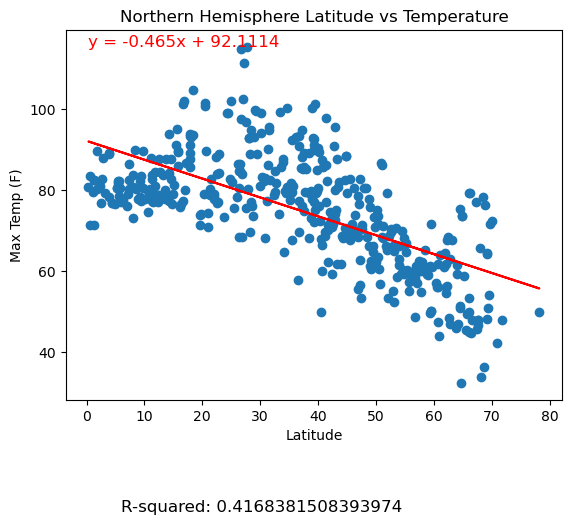

In [134]:
# Linear regression on Northern Hemisphere
 # Plot regression line

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
plot_linear_regression(x, y, "Latitude", "Max Temp (F)", "Northern Hemisphere Latitude vs Temperature")


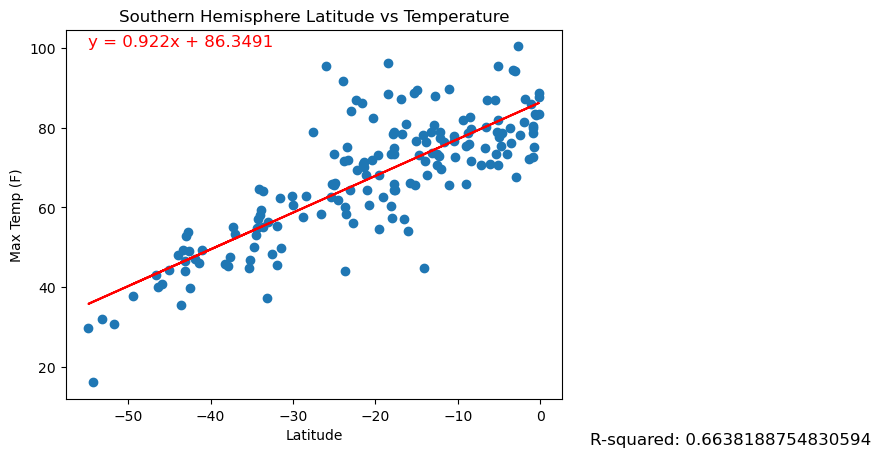

In [135]:
# Linear regression on Southern Hemisphere
 # Plot regression line

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
plot_linear_regression(x, y, "Latitude", "Max Temp (F)", "Southern Hemisphere Latitude vs Temperature")


**Discussion about the linear relationship:** 
It would appear that the temperature increases the closer you move towards 0 degrees latitude aka equator according to both N ans S hemisphere data. 

### Humidity vs. Latitude Linear Regression Plot

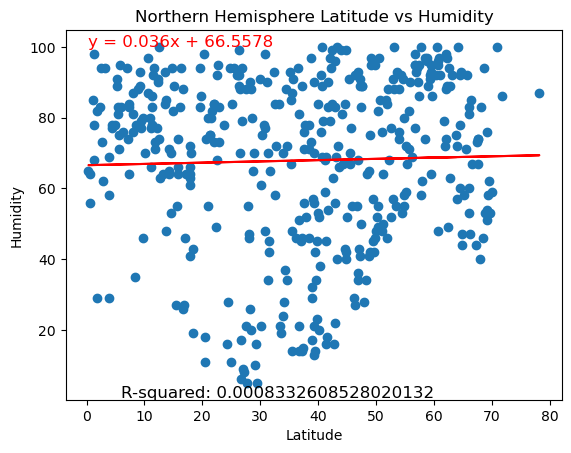

In [136]:
 # Plot regression line
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity", "Northern Hemisphere Latitude vs Humidity")

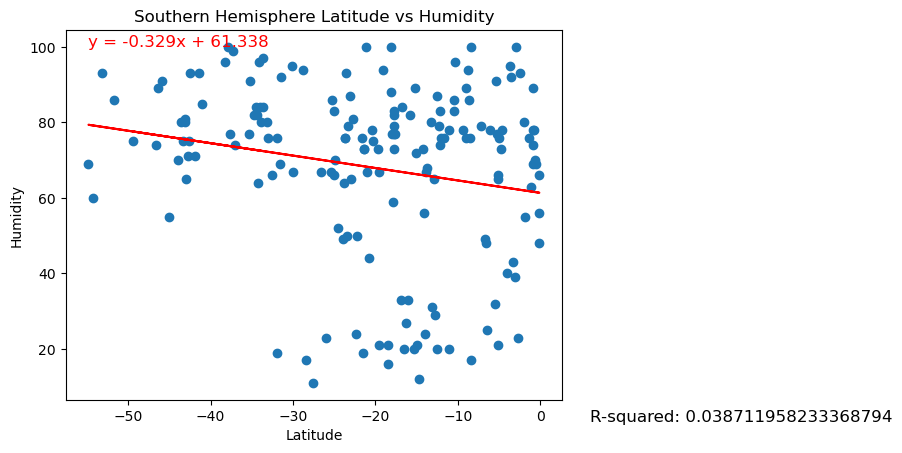

In [143]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity", "Southern Hemisphere Latitude vs Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

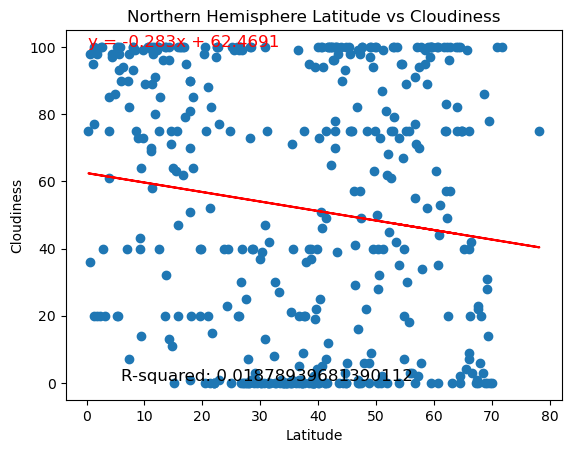

In [138]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "Cloudiness", "Northern Hemisphere Latitude vs Cloudiness")

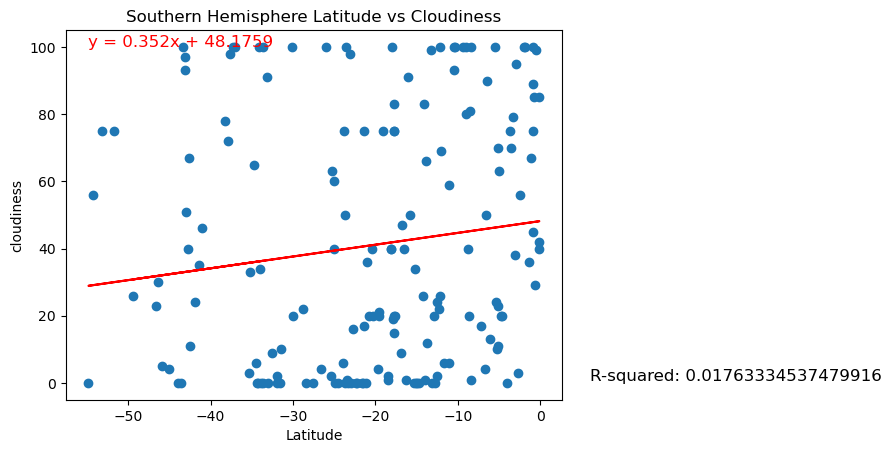

In [145]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "cloudiness", "Southern Hemisphere Latitude vs Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

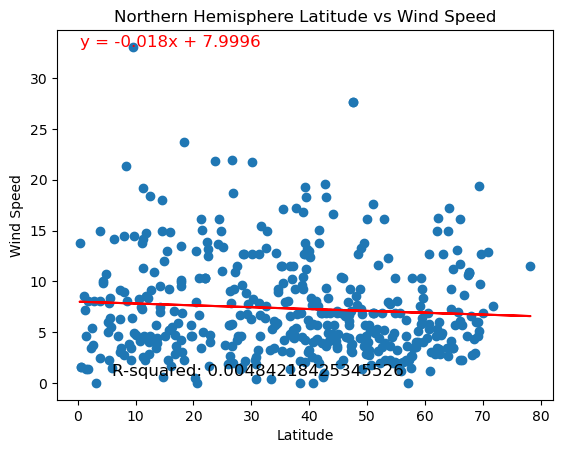

In [147]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed", "Northern Hemisphere Latitude vs Wind Speed")

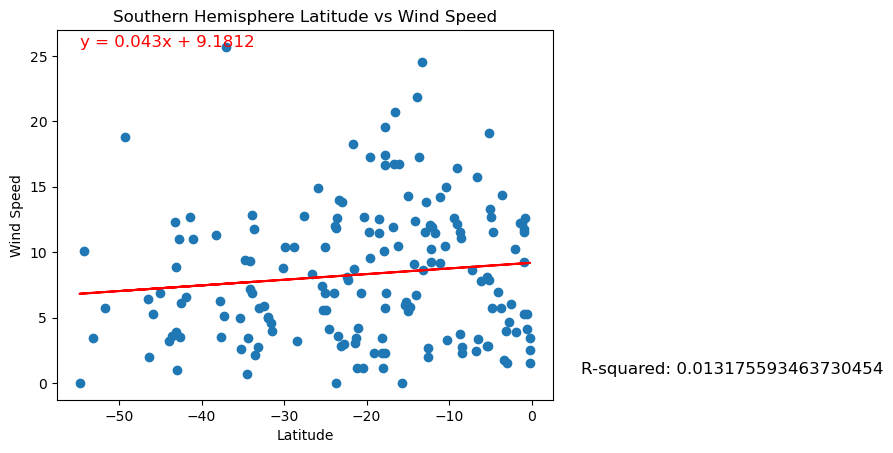

In [142]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed", "Southern Hemisphere Latitude vs Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE